# <center>MATHEMATICS AND STATISTICS FOR DATA SCIENCE</center>
<center>Thời gian: 180 phút</center>
<center>Ngày thi: 20/09/2020</center>
<center> ****** </center>
<center>Thí sinh: <b>TRẦN HOÀNG BÁCH  </b> </center>    
<center>   ---   </b> </center>  
<center>Câu 2: Hồi quy tuyến tính </b> </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from scipy import stats
from sklearn import linear_model

In [2]:
# Load data
data = pd.read_excel('Data/IQ4.xls', index_col=0)
data.head()

,diem_1,diem_2,diem_3,diem_4,IQ
stt,,,,,
1,8,2.0,7.0,7,68
2,8,8.4,6.4,8,137
3,7,7.6,7.8,8,135
4,8,3.0,2.5,6,79
5,8,4.4,3.8,6,107


## Câu 2.1

In [3]:
# Check null value, data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   diem_1  20 non-null     int64  
 1   diem_2  20 non-null     float64
 2   diem_3  20 non-null     float64
 3   diem_4  20 non-null     int64  
 4   IQ      20 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 960.0 bytes


In [4]:
# Không có Null value

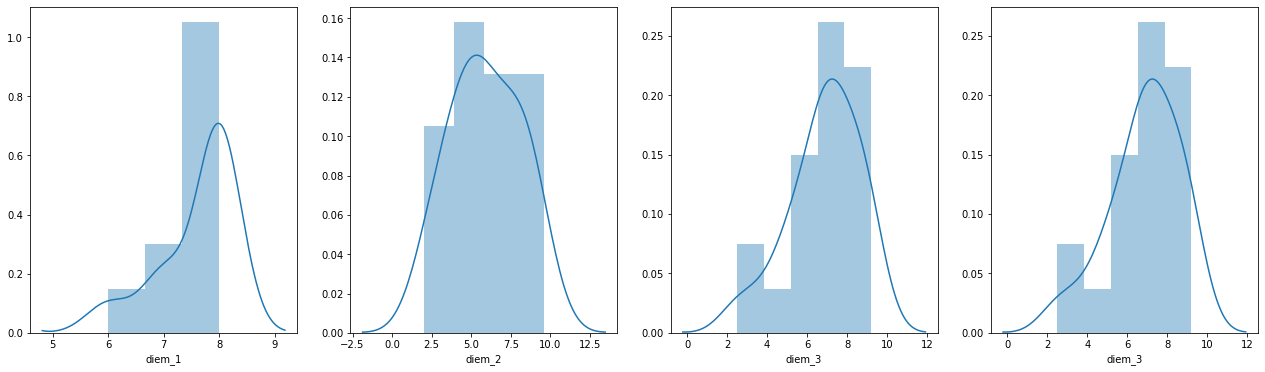

In [5]:
# Vẽ biểu đồ phân phối tần số điểm thi của các môn
plt.figure(figsize=(22,6))
plt.subplot(1,4,1)
sb.distplot(data['diem_1'])
plt.subplot(1,4,2)
sb.distplot(data['diem_2'])
plt.subplot(1,4,3)
sb.distplot(data['diem_3'])
plt.subplot(1,4,4)
sb.distplot(data['diem_3'])
plt.show()

## Câu 2.2

In [6]:
# Tính các giá trị thống kê cơ bản của các điểm thi và IQ
for i in data.columns:
    print('Các giá trị thống kê cơ bản của %s' %i)
    print('Mean: %.2f,\t Median: %.2f,\nMode: %i count: %i times,\nMax : %i,\t Min: %i,\nVariance: %.2f, Std: %.4f'
                %(np.mean(data[i]), np.median(data[i]), stats.mode(data[i])[0], stats.mode(data[i])[1],
                    data[i].max(), data[i].min(), data[i].var(), data[i].std()))
    print('------------------------------')

Các giá trị thống kê cơ bản của diem_1
Mean: 7.60,	 Median: 8.00,
Mode: 8 count: 14 times,
Max : 8,	 Min: 6,
Variance: 0.46, Std: 0.6806
------------------------------
Các giá trị thống kê cơ bản của diem_2
Mean: 5.92,	 Median: 5.80,
Mode: 4 count: 2 times,
Max : 9,	 Min: 2,
Variance: 4.90, Std: 2.2142
------------------------------
Các giá trị thống kê cơ bản của diem_3
Mean: 6.86,	 Median: 7.10,
Mode: 7 count: 2 times,
Max : 9,	 Min: 2,
Variance: 3.22, Std: 1.7934
------------------------------
Các giá trị thống kê cơ bản của diem_4
Mean: 7.00,	 Median: 7.00,
Mode: 6 count: 7 times,
Max : 9,	 Min: 6,
Variance: 0.84, Std: 0.9177
------------------------------
Các giá trị thống kê cơ bản của IQ
Mean: 115.20,	 Median: 120.00,
Mode: 110 count: 2 times,
Max : 140,	 Min: 68,
Variance: 496.38, Std: 22.2796
------------------------------


## Câu 2.3

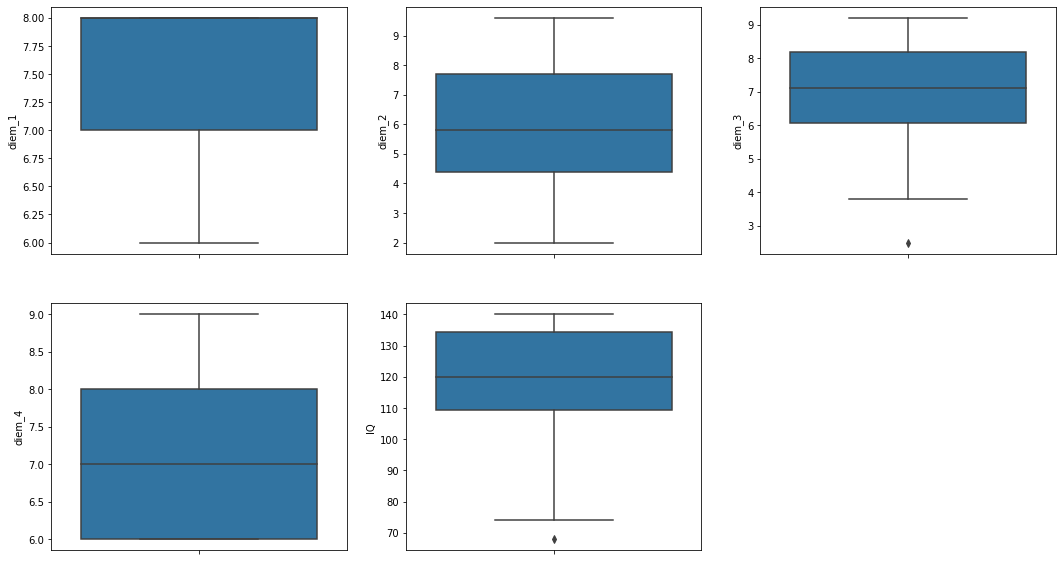

In [7]:
# Trực quan hoá dữ liệu bằng boxplot để có thể xem xét ban đầu các outlier ra sao
plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
sb.boxplot(data=data, y='diem_1')
plt.subplot(2,3,2)
sb.boxplot(data=data, y='diem_2')
plt.subplot(2,3,3)
sb.boxplot(data=data, y='diem_3')
plt.subplot(2,3,4)
sb.boxplot(data=data, y='diem_4')
plt.subplot(2,3,5)
sb.boxplot(data=data, y='IQ')
plt.show()

Nhận xét: Qua trực quan trên biểu đồ, Outliers có ở diem_3 và IQ, số lượng Outliers ít

In [8]:
# Loại bỏ null value nếu có
df = data.dropna()
# Lựa chọn mốc z
n = 3
# Tính Z-Score cho dư liễu
z_1 = stats.zscore(df['diem_1'])
z_2 = stats.zscore(df['diem_2'])
z_3 = stats.zscore(df['diem_3'])
z_4 = stats.zscore(df['diem_4'])
z_iq = stats.zscore(df['IQ'])
# Loại trừ Outliers với mốc z > 3 or z < -3
df = df.iloc[np.where((z_1 > -n) & (z_1 < n) &
                      (z_2 > -n) & (z_2 < n) &
                      (z_3 > -n) & (z_3 < n) &
                      (z_4 > -n) & (z_4 < n) &                      
                      (z_iq > -n)& (z_iq < n))[0]]
# Kết quả df
df.shape

(20, 5)

Nhận xét: Sử dụng quy tắc 3-Sigma để xác định Outliers trên điểm thi và IQ, kết quả cho thấy không có Observations nào bị loại trừ  

==> Dữ liệu không có Outliers nếu theo nguyên tắc 3-Sigma

## Câu 2.4
Để chọn 1 trong 4 điểm thi để làm cơ sở dự đoán IQ theo phương pháp hồi quy tuyến tính, trước hết ta xét correlation giữa các môn học đó với IQ,nên lựa chọn môn nào có correlation gần 1 hoặc -1 nhất để làm cơ sở, thể hiện có sự phụ thuộc tuyến tính tốt hơn giữa môn đó và IQ

In [9]:
# Tạo bảng Corr cho data
df.corr()['IQ']

diem_1   -0.088168
diem_2    0.872419
diem_3    0.471522
diem_4    0.622977
IQ        1.000000
Name: IQ, dtype: float64

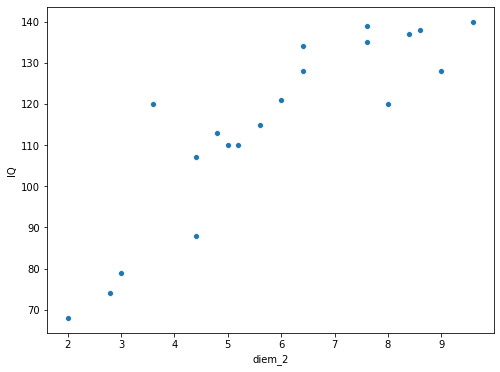

In [10]:
# Diem_2 và IQ có corr coeff gần 1 nhất
# Trực quan hoá diem_2 và IQ
plt.figure(figsize=(8,6))
sb.scatterplot(data=df, x='diem_2', y='IQ')
plt.show()

**Nhận xét:** Qua bảng corr coef và đồ thị trực quan hoá, **Diem_2** có mức độ tương quan thuận với IQ nhất trong 4 Môn (0.87), và hệ số corr coef cũng gần 1 nên phù hợp để lựa chọn làm cơ sở dự đoán IQ theo phương pháp hồi quy tuyến tính 

In [11]:
# Tạo lập ma trận A chứa biến độc lập diemToan và 1 để tính toán
one = np.ones((df['diem_2'].shape[0],1))
diem_2 = np.array(df['diem_2']).reshape(-1,1)
A = np.concatenate((diem_2, one), axis=1)
A[:5,:]

array([[2. , 1. ],
       [8.4, 1. ],
       [7.6, 1. ],
       [3. , 1. ],
       [4.4, 1. ]])

In [12]:
b = np.array(df['IQ'])

In [13]:
# Cách 1: Sử dụng hồi quy tuyến tính theo phương pháp Gradient Descent
def gradient_descent_2(alpha, x, y, numIterations):
    M     = x.shape[0] # number of samples
    theta = np.ones(2)
    x_T   = x.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss       = hypothesis - y
        # J          = np.sum(loss ** 2) / (2 * M)  # cost
        # print("iter %s | J: %.3f" % (iter, J))      
        gradient   = np.dot(x_T, loss) / M      
        
        theta    = theta - (alpha * gradient)  # update
    return theta
theta = gradient_descent_2(0.01, A, b, 100000)
print('Regression line by Gradient Descent: \t \t  IQ = %.4f * Diem_2 + %.4f' %(theta[0], theta[1]))

Regression line by Gradient Descent: 	 	  IQ = 8.7783 * Diem_2 + 63.2322


In [14]:
# Cach 2: Dùng Pseudo Inverse, giai phuong tinh Ax = b
x = np.linalg.pinv(A) @ b
print('Regression line by Pseudo Inverse: \t \t  IQ = %.4f * Diem_2 + %.4f' %(x[0], x[1]))

Regression line by Pseudo Inverse: 	 	  IQ = 8.7783 * Diem_2 + 63.2322


In [15]:
# Cach 3: Dùng thư viện Scikit-learn Linear Model
regr = linear_model.LinearRegression()
regr.fit(diem_2,b)
print('Regression line by Scikit-learn Lib: \t \t  IQ = %.4f * Diem_2 + %.4f' %(regr.coef_, regr.intercept_))

Regression line by Scikit-learn Lib: 	 	  IQ = 8.7783 * Diem_2 + 63.2322


Nhận xét: Kết quả hồi quy tuyến tính bằng 3 cách Gradient Descent, Pseudo Inverse và Scikit-Learn là cho kết quả giống nhau

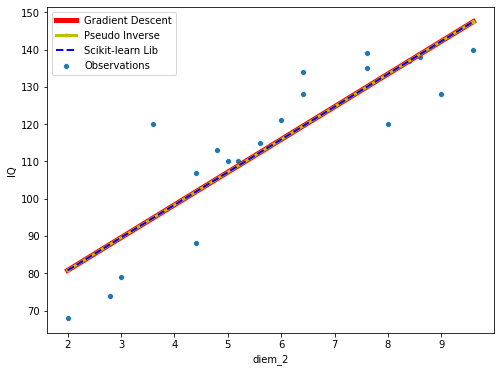

In [16]:
# Trực quan hoá dữ liệu
x_visual = np.array([min(diem_2), max(diem_2)])

plt.figure(figsize=(8,6))
sb.scatterplot(data=df, x='diem_2', y='IQ', label='Observations')
plt.plot(x_visual, theta[0]     * x_visual + theta[1]           , '-' , color='r', linewidth=5, label='Gradient Descent')
plt.plot(x_visual, x[0]         * x_visual + x[1]               , '.-', color='y', linewidth=3, label='Pseudo Inverse')
plt.plot(x_visual, regr.coef_   * x_visual + regr.intercept_    , '--', color='b', linewidth=2, label='Scikit-learn Lib')
plt.legend()
plt.show()

## Câu 2.5

In [17]:
# Dự đoán chỉ số IQ với x_test
x_test = np.arange(0.5,10.1,0.5)
predicted_IQ = x[0]     * x_test + x[1]
for i in range(predicted_IQ.shape[0]):
    print('Với diem_2 %.1f, dự đoán IQ là: %.1f' %(x_test[i], predicted_IQ[i]))

Với diem_2 0.5, dự đoán IQ là: 67.6
Với diem_2 1.0, dự đoán IQ là: 72.0
Với diem_2 1.5, dự đoán IQ là: 76.4
Với diem_2 2.0, dự đoán IQ là: 80.8
Với diem_2 2.5, dự đoán IQ là: 85.2
Với diem_2 3.0, dự đoán IQ là: 89.6
Với diem_2 3.5, dự đoán IQ là: 94.0
Với diem_2 4.0, dự đoán IQ là: 98.3
Với diem_2 4.5, dự đoán IQ là: 102.7
Với diem_2 5.0, dự đoán IQ là: 107.1
Với diem_2 5.5, dự đoán IQ là: 111.5
Với diem_2 6.0, dự đoán IQ là: 115.9
Với diem_2 6.5, dự đoán IQ là: 120.3
Với diem_2 7.0, dự đoán IQ là: 124.7
Với diem_2 7.5, dự đoán IQ là: 129.1
Với diem_2 8.0, dự đoán IQ là: 133.5
Với diem_2 8.5, dự đoán IQ là: 137.8
Với diem_2 9.0, dự đoán IQ là: 142.2
Với diem_2 9.5, dự đoán IQ là: 146.6
Với diem_2 10.0, dự đoán IQ là: 151.0
